# comparison of projected wetland areas in different scenarios over time

In [1]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = None


In [2]:
HABITAT_COLUMNS = ['Developed Dry Land', 'Undeveloped Dry Land', 'Swamp',
       'Cypress Swamp', 'Inland-Fresh Marsh', 'Tidal-Fresh Marsh',
       'Trans. Salt Marsh', 'Regularly-Flooded Marsh', 'Mangrove',
       'Estuarine Beach', 'Tidal Flat', 'Ocean Beach', 'Ocean Flat',
       'Rocky Intertidal', 'Inland Open Water', 'Riverine Tidal',
       'Estuarine Open Water', 'Tidal Creek', 'Open Ocean',
       'Irreg.-Flooded Marsh', 'Inland Shore', 'Tidal Swamp'
                  ]

categories = {
    'MANGROVE'   : ["Trans. Salt Marsh", "Mangrove", "Estuarine Beach"],
    'TIDAL_FLAT' : ["Regularly-Flooded Marsh", "Estuarine Beach", "Tidal Flat", "Tidal Swamp"],
    'REEF'       : ["Ocean Flat", "Rocky Intertidal"]

}

In [3]:
final_df = pd.DataFrame()
types = ['DEM', 'ADEM', 'CONCEPT_PLAN']
for t in types:
    files = glob.glob(f'./data/summarized/{t}/**/*.CSV')

    for file in files:
        rcp_level = file.split('/')[4]

        df = pd.read_csv(file)
        df = df[['Date'] + HABITAT_COLUMNS]
        df = df.set_index('Date')
        
        for category_key in categories.keys():
            sum_for_single_habitat = df[categories[category_key]].sum(axis=1)
            
            column_name = file.split('/')[-1].split('.CSV')[0] + f'_{t}_{category_key}'
            final_df[column_name] = sum_for_single_habitat
            
final_df = final_df.reset_index()
final_df = final_df[1:]


In [4]:
plt.style.use('ggplot') 

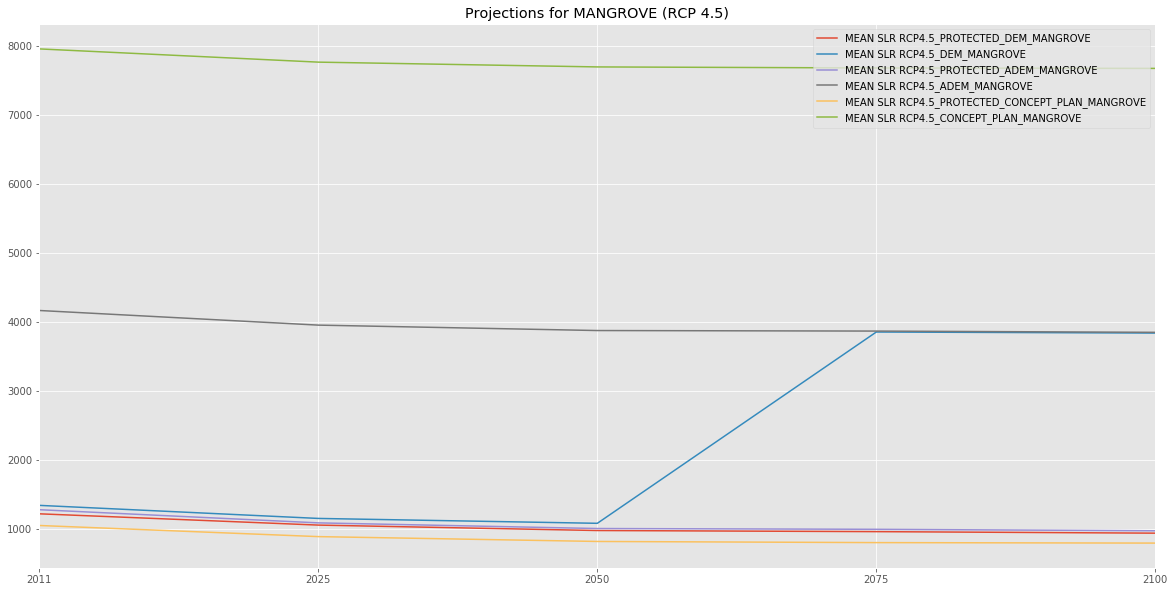

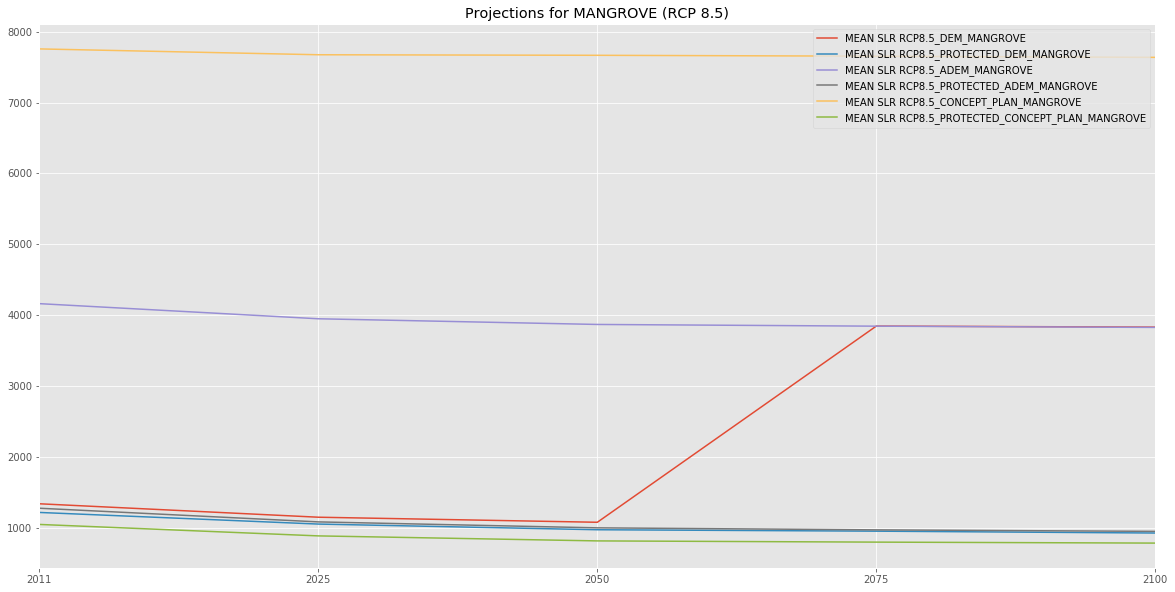

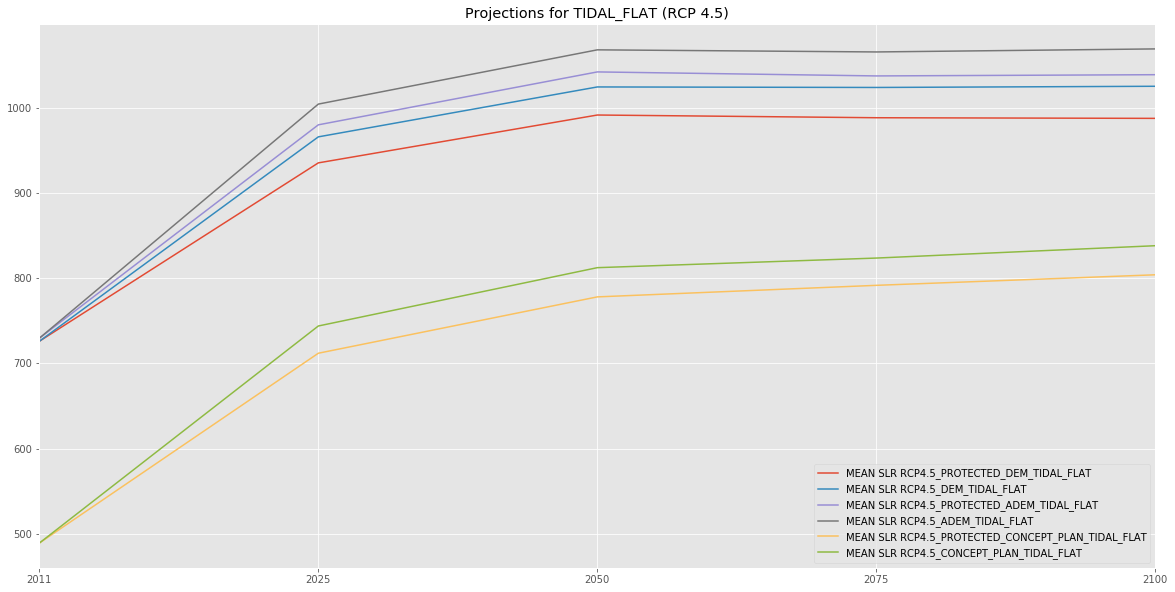

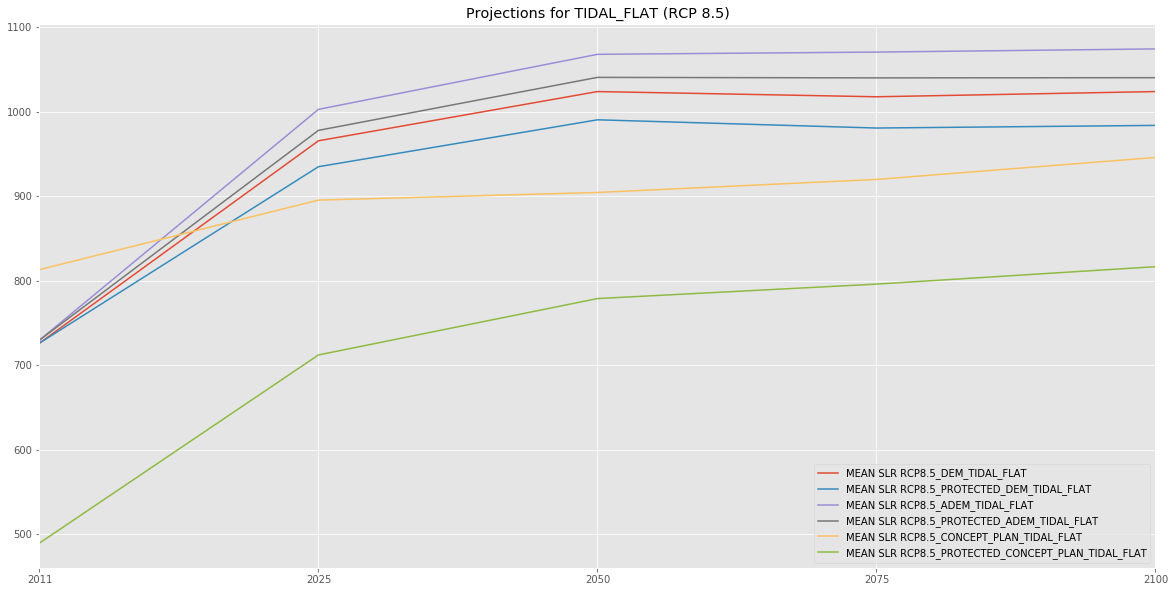

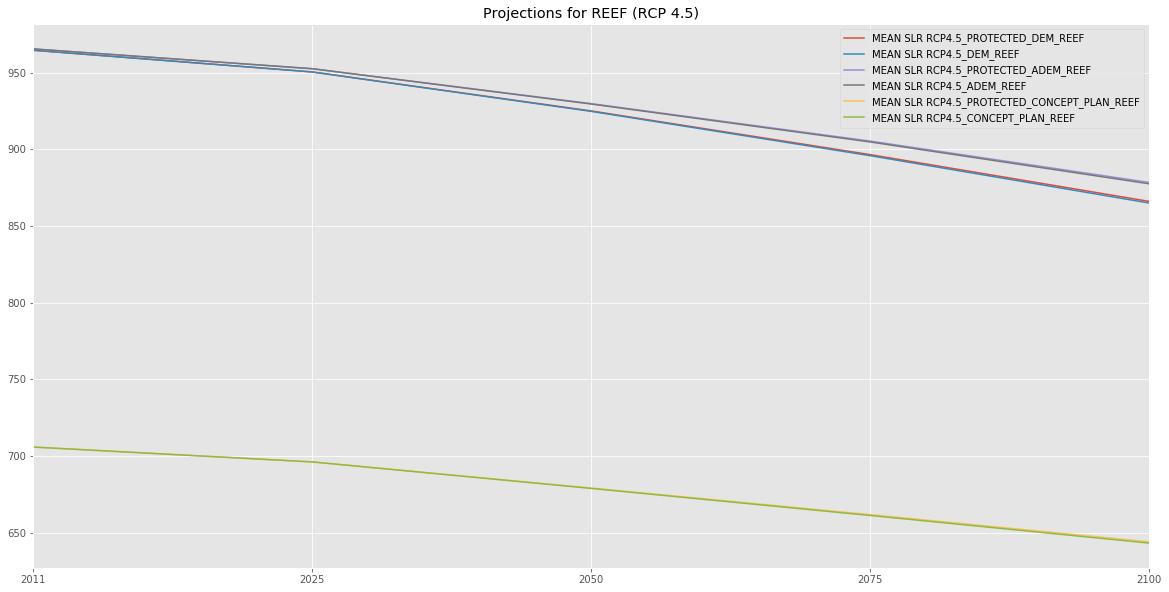

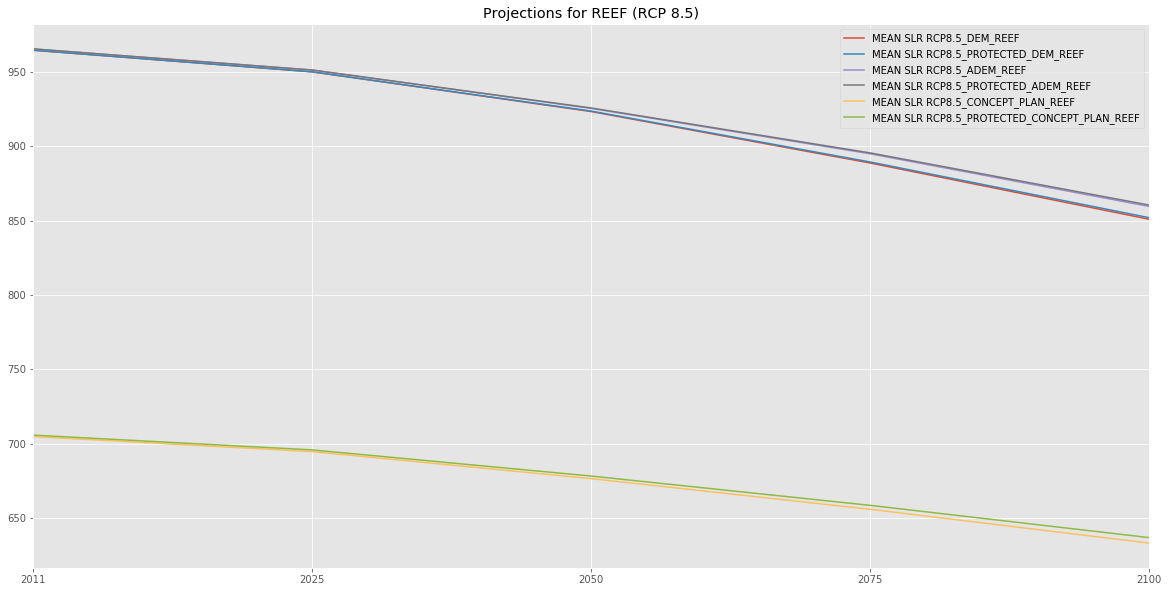

In [5]:
habitats = categories.keys()
for habitat in habitats:
    habitat_columns       = [col for col in final_df.columns if habitat in col]
    habitat_columns_rcp45 = [col for col in habitat_columns if 'RCP4.5' in col]
    habitat_columns_rcp85 = [col for col in habitat_columns if 'RCP8.5' in col]
    
    habitat_df = final_df[habitat_columns_rcp45]
    fig = habitat_df.plot(figsize=(20,10)).get_figure()
    plt.title(f'Projections for {habitat} (RCP 4.5)')
    plt.xticks(range(1, 6), [2011, 2025, 2050, 2075, 2100])
    fig.savefig(f'charts/{habitat} (RCP 4.5).pdf')
    
    habitat_df = final_df[habitat_columns_rcp85]
    fig = habitat_df.plot(figsize=(20,10)).get_figure()
    plt.title(f'Projections for {habitat} (RCP 8.5)')
    plt.xticks(range(1, 6), [2011, 2025, 2050, 2075, 2100])
    fig.savefig(f'charts/{habitat} (RCP 8.5).pdf')

